# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1519]:
!pip install folium

In [1520]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [1521]:
# import ...  # your favorite data package
import pandas as pd
import numpy as np
# import ...  # your favorite visualization package
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [1522]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [1523]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [1524]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop(['dropoff_datetime'], axis=1)

In [1525]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [1526]:
df.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,N,1635


In [1527]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Распределение продолжительности поездок'}, xlabel='trip_duration', ylabel='Count'>

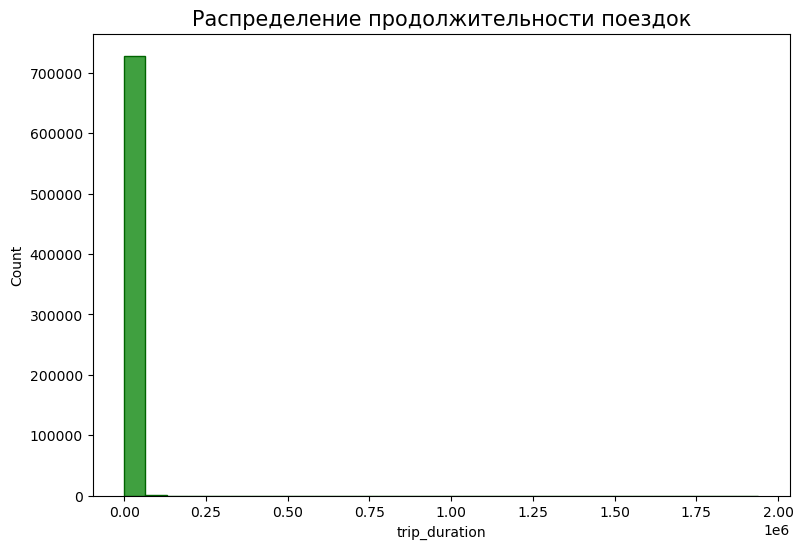

In [1528]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение продолжительности поездок', fontsize=15)
sns.histplot(df.trip_duration,
             bins=30,
             ax=ax, 
             color='green',
             edgecolor='darkgreen')

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_1218/1572756121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['trip_duration'].values)).set_title("Распределение продолжительности поездок")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Плотность заказов')

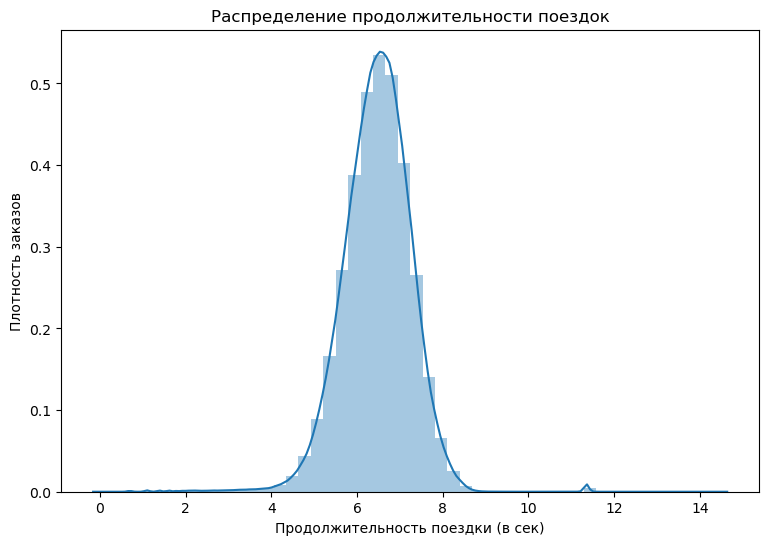

In [1529]:
# нормирование trip_duration
plt.figure(figsize=(9,6))
sns.distplot(np.log(df['trip_duration'].values)).set_title("Распределение продолжительности поездок")
plt.xlabel('Продолжительность поездки (в сек)')
plt.ylabel('Плотность заказов')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ1) RMSLE = sqrt(mean((log(y_i + 1) - log(y_pred_i + 1))^2)) 2) MSE_log = mean((log(y_i + 1) - log(y_pred_i + 1))^2) 3) RMSLE - это просто квадратный корень из MSE_log: RMSLE = sqrt(MSE_log)
Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

(пока что оставлю колонку со старым таргетом,т.к. хочу оставить для проверки функции потерь на не логарифмированных данных + потом по заданию trip_duration будут необходимы)

In [1530]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

In [1531]:
df.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id1080784,2,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,400,5.993961
1,id0889885,1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,7.003974


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [1532]:
import numpy as np

def rmsle(log1p_y_true, log1p_y_pred):
    squared_errors = (log1p_y_true - log1p_y_pred)**2
    return np.sqrt(np.mean(squared_errors))
    #raise NotImplementedError
    

# Наилучшее константное предсказание для минимизации RMSLE - это экспонента от среднего значения логарифма целевой переменной
log1p_y_true = df['log_trip_duration']
best_constant = np.exp(np.mean(log1p_y_true)) - 1
log1p_y_pred = np.repeat(np.log1p(best_constant), len(log1p_y_true)) # Создаем вектор предсказаний, повторяя константу

rmsle_best_const = rmsle(log1p_y_true, log1p_y_pred)
print(rmsle_best_const)
#assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.794732984054444


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [1533]:
pickup_datetime = df.groupby(pd.Grouper(key='pickup_datetime', freq ='D'))['id'].count()

In [1534]:
pickup_datetime = pickup_datetime.reset_index(name='count')

In [1535]:
pickup_datetime.describe()

,pickup_datetime,count
count,182,182.000000
mean,2016-03-31 12:00:00,4007.263736
min,2016-01-01 00:00:00,849.000000
25%,2016-02-15 06:00:00,3798.250000
50%,2016-03-31 12:00:00,4042.500000
75%,2016-05-15 18:00:00,4252.750000
max,2016-06-30 00:00:00,4900.000000
std,NaN,462.274328


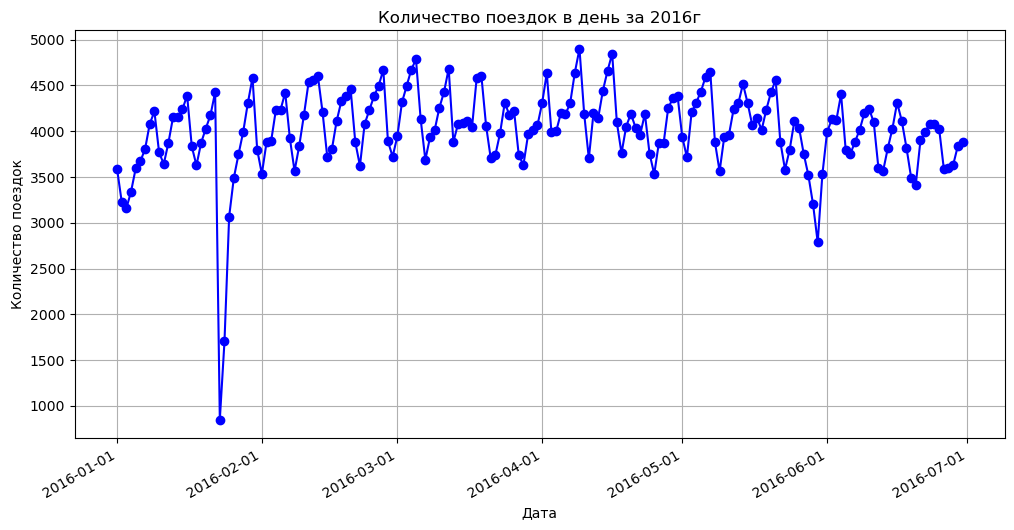

In [1536]:
plt.figure(figsize=(12, 6))
plt.plot(pickup_datetime['pickup_datetime'], pickup_datetime['count'], marker='o', linestyle='-', color='blue')
plt.title('Количество поездок в день за 2016г')
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() #форматирование меток дат
plt.grid(True) #добавление сеток
plt.show()

In [1537]:
date_an = pickup_datetime.loc[(pickup_datetime['count'] < 3204) & (pickup_datetime['pickup_datetime'] > '2016-01-03')]

In [1538]:
date_an

,pickup_datetime,count
22,2016-01-23,849
23,2016-01-24,1704
24,2016-01-25,3068
149,2016-05-29,3203
150,2016-05-30,2786


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [1539]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [1540]:
dayofweek = df.groupby(['day_of_week'])['id'].count()

In [1541]:
dayofweek = dayofweek.reset_index(name='count')

In [1542]:
dayofweek['day_of_week'] = dayofweek['day_of_week'].map({0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: ' Воскресенье'})

In [1543]:
dayofweek

,day_of_week,count
0,Понедельник,93972
1,Вторник,101254
2,Среда,105074
3,Четверг,109344
4,Пятница,111744
5,Суббота,110252
6,Воскресенье,97682


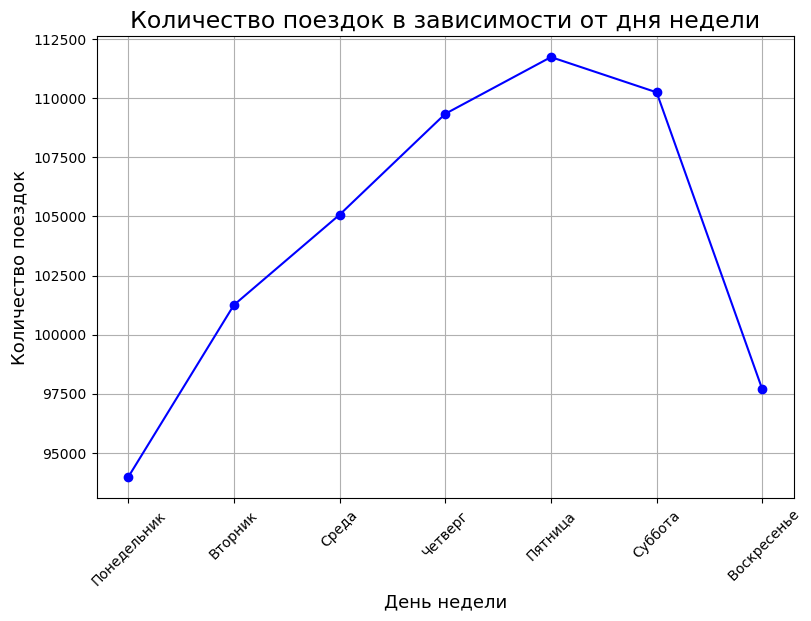

In [1544]:
plt.figure(figsize = (9, 6))

plt.plot(dayofweek['day_of_week'], dayofweek['count'],marker='o', linestyle='-', color='blue')
plt.title('Количество поездок в зависимости от дня недели', fontsize=17)

plt.xlabel('День недели', fontsize=13)
plt.ylabel('Количество поездок', fontsize=13)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.grid(True) #добавление сеток

plt.show()

Количество заказов в пятницу наиболее востребованное

In [1545]:
df['pickup_hours']=df['pickup_datetime'].apply(lambda x:x.hour)

Text(0.5, 1.0, 'Количество поездок в зависимости от времени')

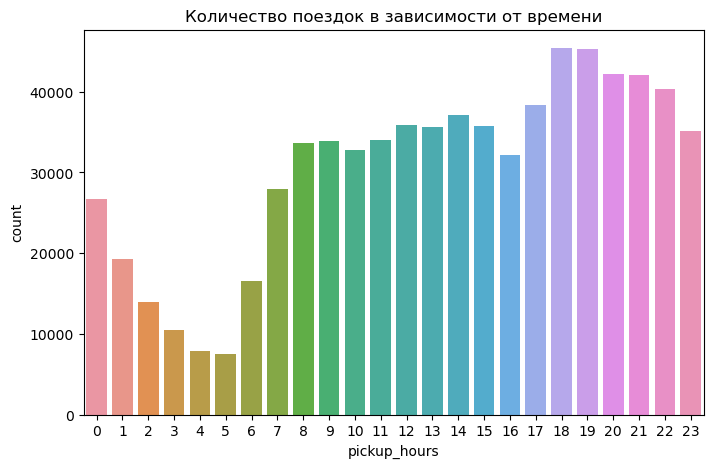

In [1546]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['pickup_hours']).set_title("Количество поездок в зависимости от времени")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

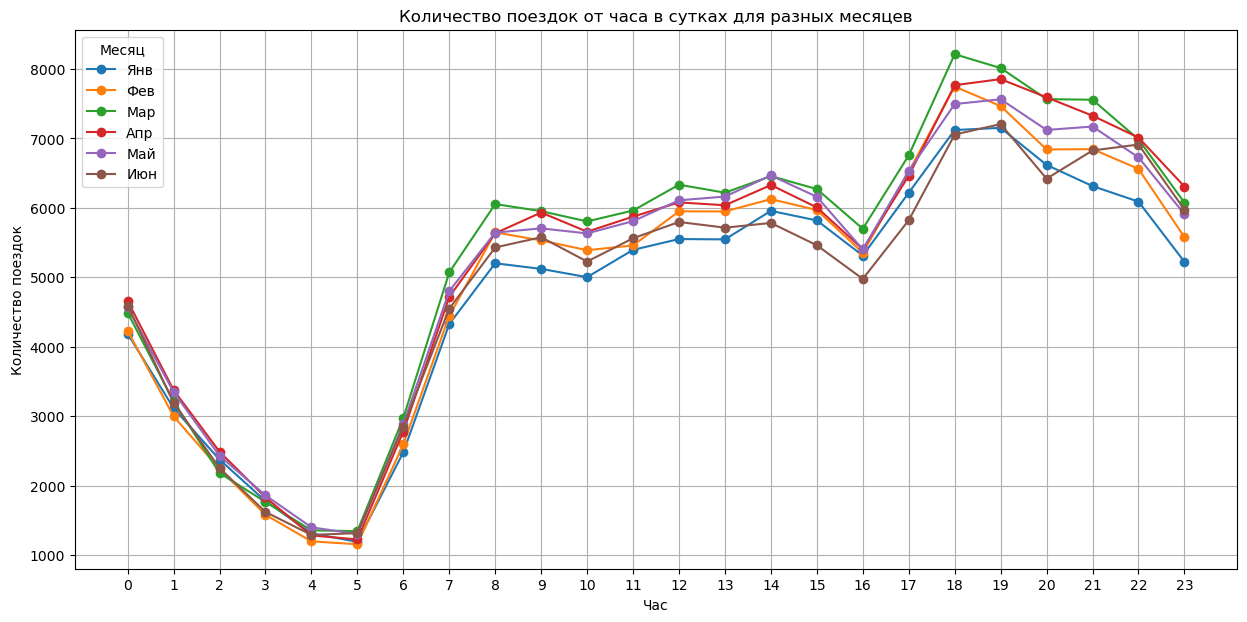

In [1547]:
# Добавим столбцы для месяца и дня недели
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Группировка по часам и месяцам
monthly_trips = df.groupby(['month', 'pickup_hours'])['id'].count().unstack(level=0)
monthly_trips.plot(kind='line', marker='o', figsize=(15, 7))
plt.title('Количество поездок от часа в сутках для разных месяцев')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))
plt.legend(title='Месяц', labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid()
plt.show()

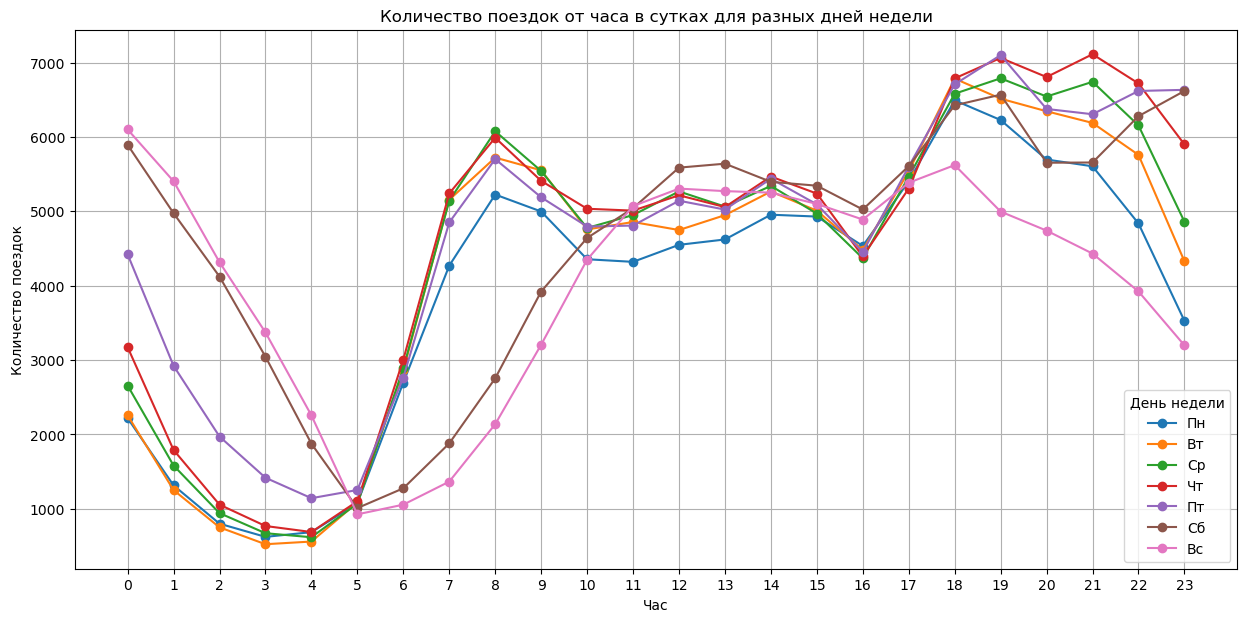

In [1548]:
# Группировка по часам и дням недели
weekly_trips = df.groupby(['day_of_week', 'pickup_hours'])['id'].count().unstack(level=0)
weekly_trips.plot(kind='line', marker='o', figsize=(15, 7))
plt.title('Количество поездок от часа в сутках для разных дней недели')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))
plt.legend(title='День недели', labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid()
plt.show()

In [1549]:
#weekly_trips

In [1550]:
#monthly_trips

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [1551]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df, test_size=0.3, random_state=42)

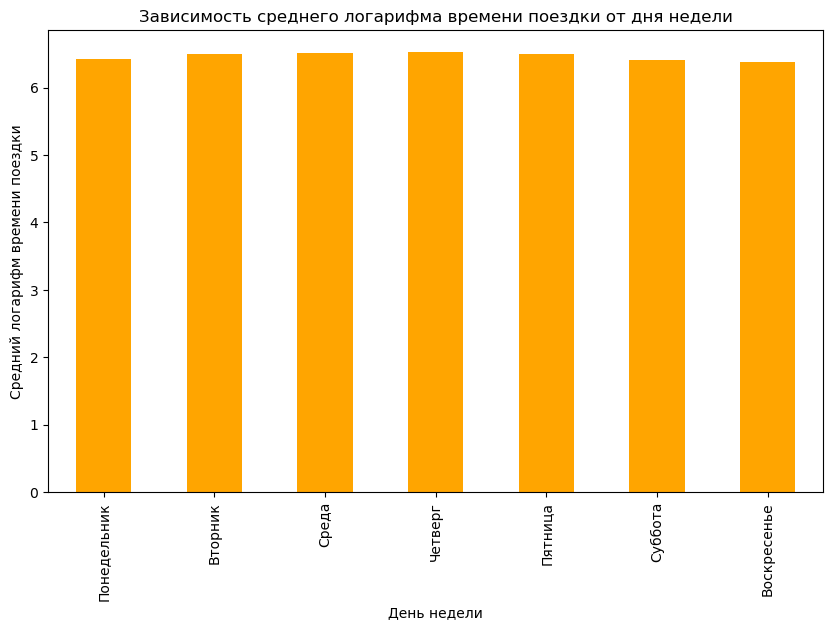

In [1552]:
# График зависимости среднего логарифма времени поездки от дня недели
plt.figure(figsize=(10, 6))
train_df.groupby('day_of_week')['log_trip_duration'].mean().plot(kind='bar',color='orange')
plt.xticks(range(7), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.show()

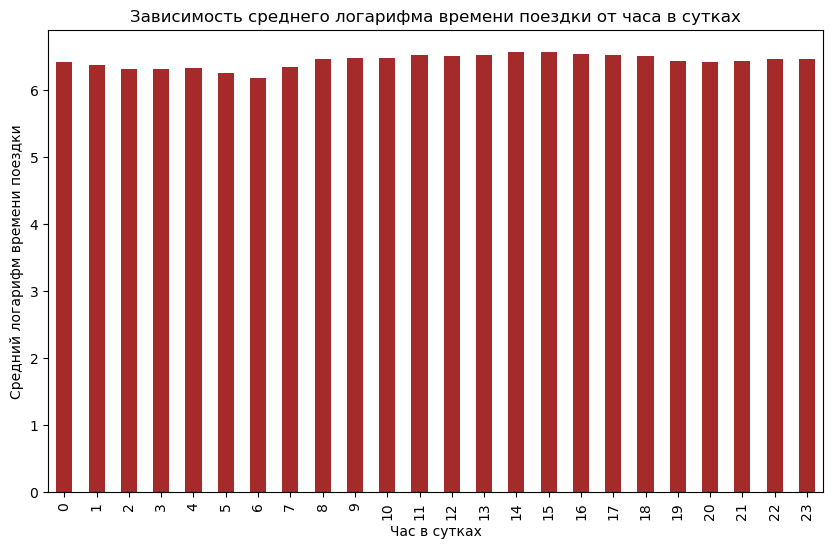

In [1553]:
# График зависимости среднего логарифма времени поездки от часа в сутках
plt.figure(figsize=(10, 6))
train_df.groupby('pickup_hours')['log_trip_duration'].mean().plot(kind='bar',color='brown')
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Средний логарифм времени поездки')
plt.show()

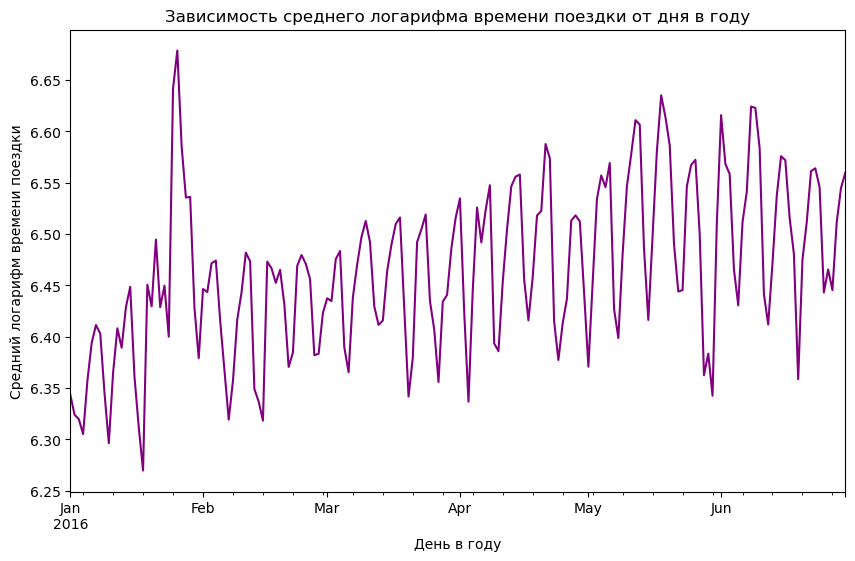

In [1554]:
#График зависимости среднего логарифма времени поездки от дня в году
plt.figure(figsize=(10, 6))
train_df.groupby(pd.Grouper(key='pickup_datetime', freq ='D'))['log_trip_duration'].mean().plot(kind='line', color='purple')  # Установка цвета на зеленый
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')
plt.show()

In [1555]:
mean_log_trip_duration = train_df['log_trip_duration'].mean()
mean_log_trip_duration

6.467253282956611

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [1556]:
#день недели - df['day_of_week']
#месяц - df['month']
#час - df['hour']
df['anomaly_period_1'] = df['pickup_datetime'].dt.date.astype(str).isin(['2016-01-23', '2016-01-24', '2016-01-25']).astype(int)
df['anomaly_period_2'] = df['pickup_datetime'].dt.date.astype(str).isin(['2016-05-29', '2016-05-30']).astype(int)
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

In [1557]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_week', 'pickup_hours', 'month',
       'anomaly_period_1', 'anomaly_period_2', 'day_of_year'],
      dtype='object')

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [1558]:
#датасет с логарифмом
df_l = df[['log_trip_duration','pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2']] 

In [1559]:
df_l.dtypes

log_trip_duration    float64
pickup_hours           int64
day_of_week            int32
month                  int32
day_of_year            int32
anomaly_period_1       int64
anomaly_period_2       int64
dtype: object

In [1560]:
df_l[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2']] = df_l[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2']].astype('object')

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_1218/4273234379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2']] = df_l[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2']].astype('object')


In [1561]:
# Разделите данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
X = df_l.drop('log_trip_duration', axis=1)
y = df_l['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1562]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [1563]:
X_train[categorical].sample(5)

,pickup_hours,day_of_week,month,day_of_year,anomaly_period_1,anomaly_period_2
455971,12,6,2,38,0,0
30299,12,0,4,95,0,0
24766,11,4,6,155,0,0
259064,8,2,3,90,0,0
208449,19,0,5,144,0,0


In [1564]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

column_transformer = ColumnTransformer ([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
])
pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_value = mean_squared_error(y_test, y_pred)
print('Test MSE = %.4f' % mse_value)

Test MSE = 0.6189


In [1565]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (510525, 6)
Size after OneHot: (510525, 223)


In [1566]:
#df_nl = df[['trip_duration','pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2']] 

In [1567]:
#df_nl[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2']] = df_nl[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2']].astype('object')

In [1568]:
#X = df_nl.drop('trip_duration', axis=1)
#y = df_nl['trip_duration']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1569]:
#categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
#X_train[categorical] = X_train[categorical].fillna("NotGiven")
#X_test[categorical] = X_test[categorical].fillna("NotGiven")

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [1572]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [1573]:
your_df = df.sample(1000)  # выбираем случайные 1000 строк из датафрейма
your_lat_values = your_df['pickup_latitude'].values  # получаем значения колонки 'pickup_latitude'
your_lon_values = your_df['pickup_longitude'].values  # получаем значения колонки 'pickup_longitude'
show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")  # показываем на карте

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [1574]:
import pandas as pd
import numpy as np

# Функция haversine для расчета расстояния между двумя точками на Земле
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # радиус Земли в километрах
    
    # Проверка входных данных
    if not (-90 <= lat1 <= 90) or not (-90 <= lat2 <= 90):
        raise ValueError("Широта должна быть в диапазоне от -90 до 90")
    if not (-180 <= lon1 <= 180) or not (-180 <= lon2 <= 180):
        raise ValueError("Долгота должна быть в диапазоне от -180 до 180")
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    if a > 1:
        a = 1
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

df['haversine'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [1575]:
df['log_haversine'] = np.log(df['haversine'] + 1) #так как не все логарифмы считаются из-за того,что значения могут нулевыми,то используем данное свойство

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [1576]:
# Вычисление корреляции между log_haversine и trip_duration
corr_log_haversine = df[['log_haversine', 'log_trip_duration']].corr().iloc[0, 1]

# Вычисление корреляции между haversine и trip_duration
corr_haversine = df[['haversine', 'log_trip_duration']].corr().iloc[0, 1]

print("Корреляция между log_haversine и log_trip_duration:", corr_log_haversine)
print("Корреляция между haversine и log_trip_duration:", corr_haversine)

Корреляция между log_haversine и log_trip_duration: 0.7505143884031574
Корреляция между haversine и log_trip_duration: 0.5660674158600453


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [1577]:
df['trip_duration_hour'] = df['trip_duration'] /60/60

In [1578]:
df['average_speed'] = df['haversine'] / (df['trip_duration_hour'])

In [1579]:
df['average_speed'].describe()

count    729322.000000
mean         14.421448
std          12.341027
min           0.000000
25%           9.124310
50%          12.796828
75%          17.843917
max        5640.493985
Name: average_speed, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


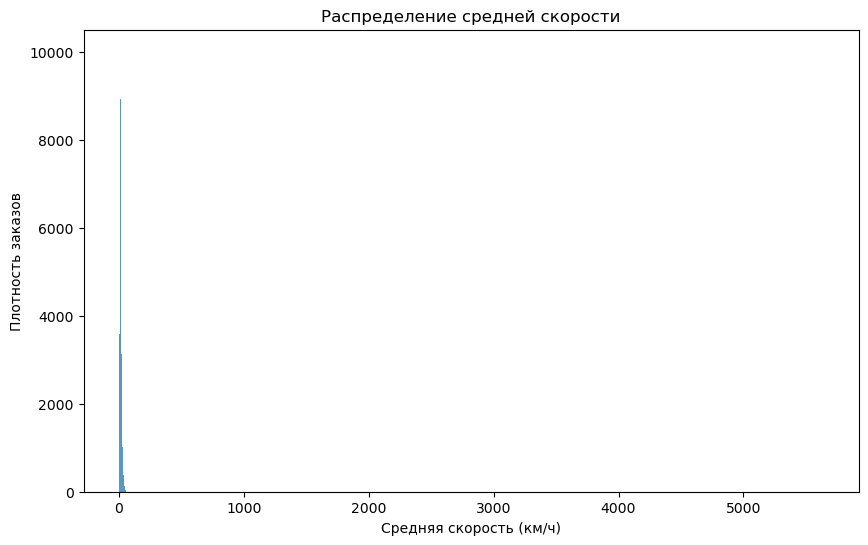

In [1580]:
# Замена бесконечных значений на NaN
df['average_speed'] = df['average_speed'].replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

plt.figure(figsize=(10, 6)) 
sns.histplot(df['average_speed'].values)
plt.title("Распределение средней скорости")
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Плотность заказов')

plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


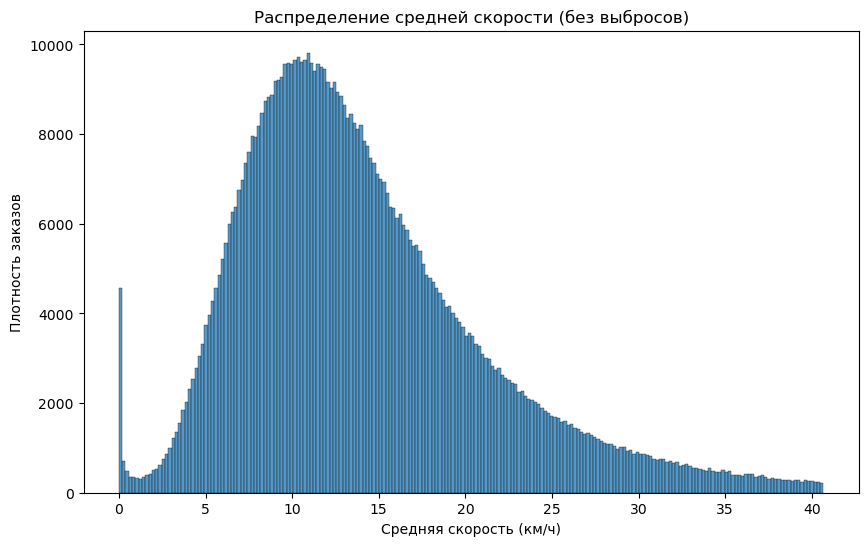

In [1581]:
# Замена бесконечных значений на NaN
df['average_speed'] = df['average_speed'].replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
# Вычисляем 99-й процентиль скорости
quantile_95 = df['average_speed'].quantile(0.99)
# Фильтруем DataFrame, оставляя только объекты со скоростью меньше 99-го процентиля
df_filtered = df[df['average_speed'] <= quantile_95]

# Строим гистограмму для отфильтрованных данных
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['average_speed'].values)
plt.title("Распределение средней скорости (без выбросов)")
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Плотность заказов')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

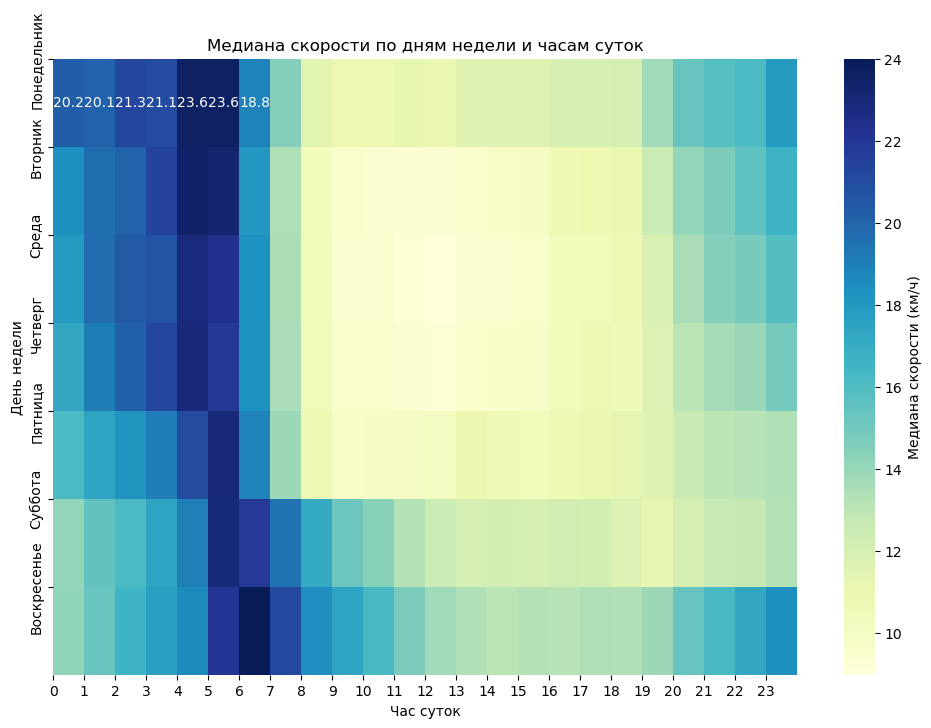

In [1582]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление медианы скоростей для каждой пары (день недели, час суток)
speed_median = df.groupby(['day_of_week', 'pickup_hours'])['average_speed'].median().unstack()

# Создание Heatmap-графика
plt.figure(figsize=(12, 8))
sns.heatmap(speed_median, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Медиана скорости (км/ч)'})
plt.title('Медиана скорости по дням недели и часам суток')
plt.xlabel('Час суток')
plt.ylabel('День недели')
plt.xticks(range(24), range(24))
plt.yticks(range(7), ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [1583]:
def trip_timing_features(time):
    rush_hour = 8 <= time.hour <= 19 and time.weekday() not in [5, 6]

    features = {
        "rush_hour": rush_hour,
        "not_rush_hour": not rush_hour
    }

    return features

In [1584]:
df["rush_hour"] = df["pickup_datetime"].apply(lambda x: trip_timing_features(x)["rush_hour"])
df["not_rush_hour"] = df["pickup_datetime"].apply(lambda x: trip_timing_features(x)["not_rush_hour"])

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [1585]:
#Люди,которые уезжали из аэропорта Джона Кеннеди 
target_lat = 40.6397
target_lon = -73.7789
epsilon1 = 0.0071 #примерный уровень разброса 
epsilon2 = 0.0125 #примерный уровень разброса 

nearby_points = df[
    (np.abs(df['pickup_latitude'] - target_lat) < epsilon1) & 
    (np.abs(df['pickup_longitude'] - target_lon) < epsilon2)
].copy()

# Добавляем столбец с расстоянием до целевой точки
nearby_points['distance'] = np.sqrt(
    (nearby_points['pickup_latitude'] - target_lat)**2 + 
    (nearby_points['pickup_longitude'] - target_lon)**2
)

# Сортируем по расстоянию
nearby_points = nearby_points.sort_values('distance')
nearby_points[['id','pickup_latitude', 'pickup_longitude']]

,id,pickup_latitude,pickup_longitude
450389,id2798478,40.641624,-73.781570
601669,id0274429,40.642593,-73.780579
175469,id3555270,40.641479,-73.782036
644871,id0405294,40.642662,-73.781586
328368,id3785530,40.643757,-73.777138
...,...,...,...
369344,id2529500,40.646133,-73.791367
298467,id2051637,40.646530,-73.791183
218177,id2343269,40.646641,-73.791130
565309,id3996735,40.646526,-73.791290


In [1586]:
#Люди,которые приезжали в аэропорт Джона Кеннеди 
target_lat = 40.6397 #координаты аэропорта
target_lon = -73.7789
epsilon1 = 0.0071 #примерный уровень разброса 
epsilon2 = 0.0125 #примерный уровень разброса 

nearby_points_v = df[
    (np.abs(df['dropoff_latitude'] - target_lat) < epsilon1) & 
    (np.abs(df['dropoff_longitude'] - target_lon) < epsilon2)
].copy()

# Добавляем столбец с расстоянием до целевой точки
nearby_points_v['distance'] = np.sqrt(
    (nearby_points['dropoff_latitude'] - target_lat)**2 + 
    (nearby_points['dropoff_longitude'] - target_lon)**2
)

# Сортируем по расстоянию
nearby_points_v = nearby_points_v.sort_values('distance')
nearby_points_v[['id','dropoff_latitude', 'dropoff_longitude']]

,id,dropoff_latitude,dropoff_longitude
601669,id0274429,40.644707,-73.780136
701702,id2741118,40.644634,-73.777107
378730,id0467237,40.644867,-73.777313
70505,id0976907,40.644871,-73.777321
557430,id3176701,40.644859,-73.777245
...,...,...,...
728455,id2262699,40.643757,-73.786163
728540,id0364657,40.642738,-73.789597
728769,id1136705,40.643742,-73.783478
729065,id1857072,40.643970,-73.782852


In [1587]:
#Люди,которые уезжали из аэропорта Ла Гвардия
target_lat = 40.7769 #координаты аэропорта 
target_lon = -73.8740
epsilon1 = 0.0038 #примерный уровень разброса 
epsilon2 = 0.0028 #примерный уровень разброса 

nearby_points_la = df[
    (np.abs(df['pickup_latitude'] - target_lat) < epsilon1) & 
    (np.abs(df['pickup_longitude'] - target_lon) < epsilon2)
].copy()

# Добавляем столбец с расстоянием до целевой точки
nearby_points_la['distance'] = np.sqrt(
    (nearby_points['pickup_latitude'] - target_lat)**2 + 
    (nearby_points['pickup_longitude'] - target_lon)**2
)

# Сортируем по расстоянию
nearby_points_la = nearby_points_la.sort_values('distance')
nearby_points_la[['id','pickup_latitude', 'pickup_longitude']]

,id,pickup_latitude,pickup_longitude
8,id2436943,40.774281,-73.872887
125,id1028166,40.774090,-73.873077
200,id0866402,40.774086,-73.873146
260,id1146604,40.774094,-73.873039
436,id3118199,40.774002,-73.871284
...,...,...,...
728442,id3310890,40.774055,-73.874512
728580,id1989855,40.774239,-73.872910
728824,id3270325,40.774155,-73.873108
729124,id1962776,40.774071,-73.874542


In [1588]:
#Люди,которые приезжали в аэропорт Ла Гвардия
target_lat = 40.7769
target_lon = -73.8740
epsilon1 = 0.0038 #примерный уровень разброса 
epsilon2 = 0.0028 #примерный уровень разброса

nearby_points_lav = df[
    (np.abs(df['dropoff_latitude'] - target_lat) < epsilon1) & 
    (np.abs(df['dropoff_longitude'] - target_lon) < epsilon2)
].copy()

# Добавляем столбец с расстоянием до целевой точки
nearby_points_lav['distance'] = np.sqrt(
    (nearby_points['dropoff_latitude'] - target_lat)**2 + 
    (nearby_points['dropoff_longitude'] - target_lon)**2
)

# Сортируем по расстоянию
nearby_points_lav = nearby_points_lav.sort_values('distance')
nearby_points_lav[['id','dropoff_latitude', 'dropoff_longitude']]

,id,dropoff_latitude,dropoff_longitude
505088,id1808491,40.774414,-73.873192
665336,id3440481,40.774422,-73.873146
659659,id0657841,40.774380,-73.873245
637209,id2286758,40.774387,-73.873093
527012,id3570399,40.774384,-73.873100
...,...,...,...
727831,id2145854,40.774288,-73.873085
727889,id3929257,40.774281,-73.873459
728265,id2398150,40.774281,-73.872375
728279,id0862705,40.774273,-73.872635


In [1589]:
df['from_airport'] = df['id'].isin(nearby_points['id']) | df['id'].isin(nearby_points_la['id'])

In [1590]:
df['in_airport'] = df['id'].isin(nearby_points_v['id']) | df['id'].isin(nearby_points_lav['id'])

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

In [1591]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_week', 'pickup_hours', 'month',
       'anomaly_period_1', 'anomaly_period_2', 'day_of_year', 'haversine',
       'log_haversine', 'trip_duration_hour', 'average_speed', 'rush_hour',
       'not_rush_hour', 'from_airport', 'in_airport'],
      dtype='object')

In [1592]:
df['rush_hour'].value_counts()

rush_hour
False    408283
True     321039
Name: count, dtype: int64

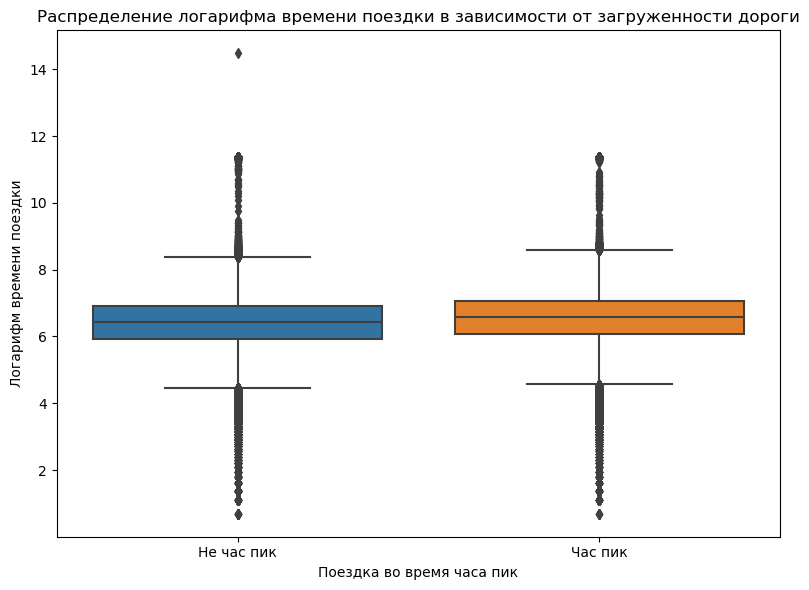

In [1593]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='rush_hour', y='log_trip_duration', data=df)
plt.title('Распределение логарифма времени поездки в зависимости от загруженноcти дороги')
plt.xlabel('Поездка во время часа пик')
plt.ylabel('Логарифм времени поездки')
plt.xticks([0, 1], ['Не час пик', 'Час пик'])  # Преобразование числовых меток в текстовые
plt.tight_layout()
plt.show()

In [1594]:
df['from_airport'].value_counts()

from_airport
False    711013
True      18309
Name: count, dtype: int64

In [1595]:
df['in_airport'].value_counts()

in_airport
False    722159
True       7163
Name: count, dtype: int64

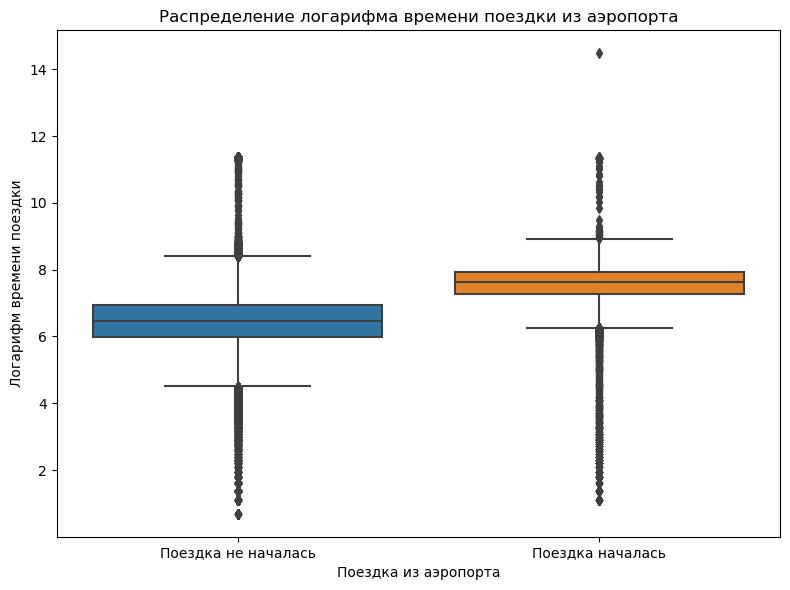

In [1596]:
# Создание boxplot
plt.figure(figsize=(8, 6))  # Размер фигуры
sns.boxplot(x='from_airport', y='log_trip_duration', data=df)
plt.title('Распределение логарифма времени поездки из аэропорта')
plt.xlabel('Поездка из аэропорта')
plt.ylabel('Логарифм времени поездки')
plt.xticks([0, 1], ['Поездка не началась', 'Поездка началась']) 
plt.tight_layout()
plt.show()

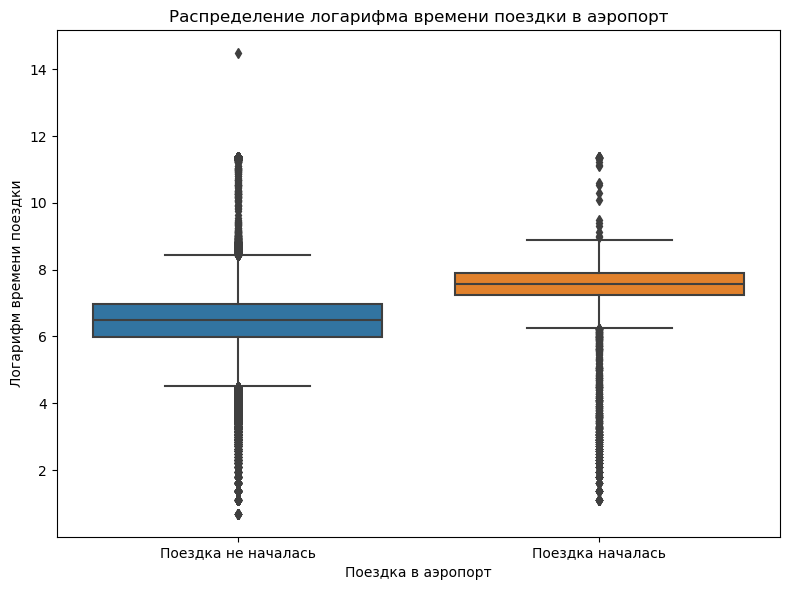

In [1597]:
plt.figure(figsize=(8, 6))  # Размер фигуры
sns.boxplot(x='in_airport', y='log_trip_duration', data=df)
plt.title('Распределение логарифма времени поездки в аэропорт')
plt.xlabel('Поездка в аэропорт')
plt.ylabel('Логарифм времени поездки')
plt.xticks([0, 1], ['Поездка не началась', 'Поездка началась']) 
plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [1598]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import matplotlib.pyplot as plt

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=12, n_cols=12):
        """
        Parameters:
        n_rows (int): количество строк в сетке
        n_cols (int): количество столбцов в сетке
        """
        self.n_rows = n_rows
        self.n_cols = n_cols
        
    def fit(self, df, y=None):
        """
        Вычисляет границы сетки на основе данных
        
        Parameters:
        df (DataFrame): датафрейм с колонками pickup_latitude, pickup_longitude,
                       dropoff_latitude, dropoff_longitude
        """
        # Находим минимальные и максимальные координаты
        self.min_lat = min(df['pickup_latitude'].min(), df['dropoff_latitude'].min())
        self.max_lat = max(df['pickup_latitude'].max(), df['dropoff_latitude'].max())
        self.min_lon = min(df['pickup_longitude'].min(), df['dropoff_longitude'].min())
        self.max_lon = max(df['pickup_longitude'].max(), df['dropoff_longitude'].max())
        
        # Вычисляем размеры ячеек
        self.lat_step = (self.max_lat - self.min_lat) / self.n_rows
        self.lon_step = (self.max_lon - self.min_lon) / self.n_cols
        
        return self
    
    def transform(self, df, y=None):
        """
        Преобразует координаты в номера ячеек
        
        Parameters:
        df (DataFrame): датафрейм с координатами
        
        Returns:
        DataFrame: копия датафрейма с добавленными колонками pickup_cell и dropoff_cell
        """
        # Создаем копию датафрейма
        df_transformed = df.copy()
        
        # Вычисляем индексы ячеек для точек pickup
        pickup_row = np.floor((df['pickup_latitude'] - self.min_lat) / self.lat_step).astype(int)
        pickup_col = np.floor((df['pickup_longitude'] - self.min_lon) / self.lon_step).astype(int)
        
        # Обрабатываем краевые случаи
        pickup_row = np.clip(pickup_row, 0, self.n_rows - 1)
        pickup_col = np.clip(pickup_col, 0, self.n_cols - 1)
        
        # Вычисляем номера ячеек для pickup
        df_transformed['pickup_cell'] = pickup_row * self.n_cols + pickup_col
        
        # Аналогично для точек dropoff
        dropoff_row = np.floor((df['dropoff_latitude'] - self.min_lat) / self.lat_step).astype(int)
        dropoff_col = np.floor((df['dropoff_longitude'] - self.min_lon) / self.lon_step).astype(int)
        
        dropoff_row = np.clip(dropoff_row, 0, self.n_rows - 1)
        dropoff_col = np.clip(dropoff_col, 0, self.n_cols - 1)
        
        df_transformed['dropoff_cell'] = dropoff_row * self.n_cols + dropoff_col
        
        return df_transformed
    
    def show_map(self):
        """
        Визуализирует сетку на карте
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Рисуем вертикальные линии сетки
        for i in range(self.n_cols + 1):
            lon = self.min_lon + i * self.lon_step
            ax.plot([lon, lon], [self.min_lat, self.max_lat], 'b-', alpha=0.5)
            
        # Рисуем горизонтальные линии сетки
        for i in range(self.n_rows + 1):
            lat = self.min_lat + i * self.lat_step
            ax.plot([self.min_lon, self.max_lon], [lat, lat], 'b-', alpha=0.5)
            
        # Добавляем номера ячеек
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                cell_num = i * self.n_cols + j
                center_lat = self.min_lat + (i + 0.5) * self.lat_step
                center_lon = self.min_lon + (j + 0.5) * self.lon_step
                ax.text(center_lon, center_lat, str(cell_num), 
                       horizontalalignment='center', verticalalignment='center')
        
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title('Grid Map')
        plt.show()

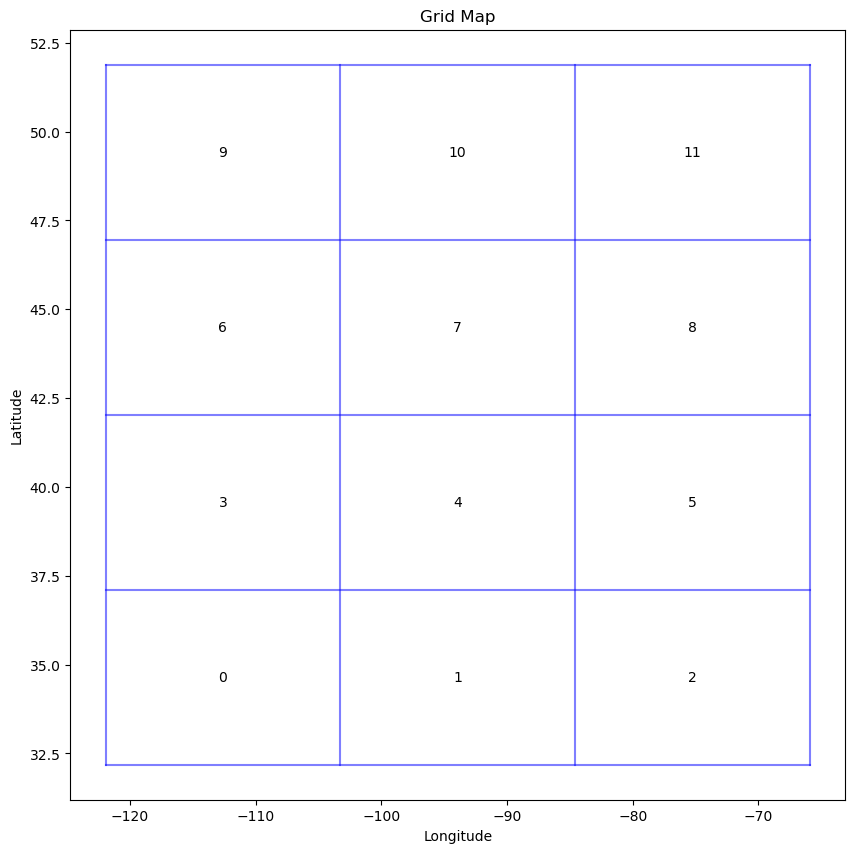

In [1599]:
# Создаем и обучаем трансформер
transformer = MapGridTransformer(n_rows=4, n_cols=3)
transformer.fit(df)
# Получаем обновленный датафрейм с новыми признаками
df = transformer.transform(df)
# Визуализируем сетку для понимания нумерации ячеек
transformer.show_map()

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [1600]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_week', 'pickup_hours', 'month',
       'anomaly_period_1', 'anomaly_period_2', 'day_of_year', 'haversine',
       'log_haversine', 'trip_duration_hour', 'average_speed', 'rush_hour',
       'not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell',
       'dropoff_cell'],
      dtype='object')

In [1601]:
df_2 = df[['trip_duration','pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2','log_haversine','rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']] 

In [1602]:
df_2 = df[['log_trip_duration','pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2','log_haversine', 'rush_hour',
       'not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']] 

In [1603]:
df_2.dtypes

log_trip_duration    float64
pickup_hours           int64
day_of_week            int32
month                  int32
day_of_year            int32
anomaly_period_1       int64
anomaly_period_2       int64
log_haversine        float64
rush_hour               bool
not_rush_hour           bool
from_airport            bool
in_airport              bool
pickup_cell            int64
dropoff_cell           int64
dtype: object

In [1604]:
df_2[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2','rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']] = df_2[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2','rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']].astype('object')

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_1218/3330215489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2','rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']] = df_2[['pickup_hours', 'day_of_week', 'month', 'day_of_year', 'anomaly_period_1', 'anomaly_period_2','rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']].astype('object')


In [1605]:
X = df_2.drop('log_trip_duration', axis=1)
y = df_2['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1606]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [1607]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [1608]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

column_transformer = ColumnTransformer ([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
])
pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_value = r2_score(y_test, y_pred)

mse_value = mean_squared_error(y_test, y_pred)
print('Test MSE = %.4f' % mse_value)
print('Test R^2 = %.4f' % r2_value)

Test MSE = 0.5833
Test R^2 = 0.0759


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [1609]:
df['vendor_id'].value_counts()

vendor_id
2    390481
1    338841
Name: count, dtype: int64

In [1610]:
df['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

In [1611]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

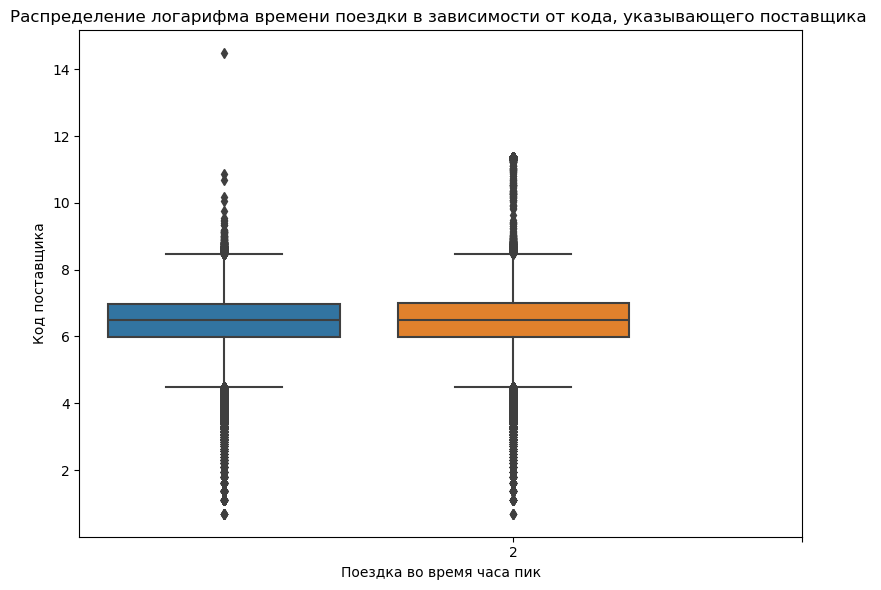

In [1612]:
plt.figure(figsize=(8, 6))  # Размер фигуры
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title('Распределение логарифма времени поездки в зависимости от кода, указывающего поставщика ')
plt.xlabel('Поездка во время часа пик')
plt.ylabel('Код поставщика')
plt.xticks([1,2]) 
plt.tight_layout()
plt.show()

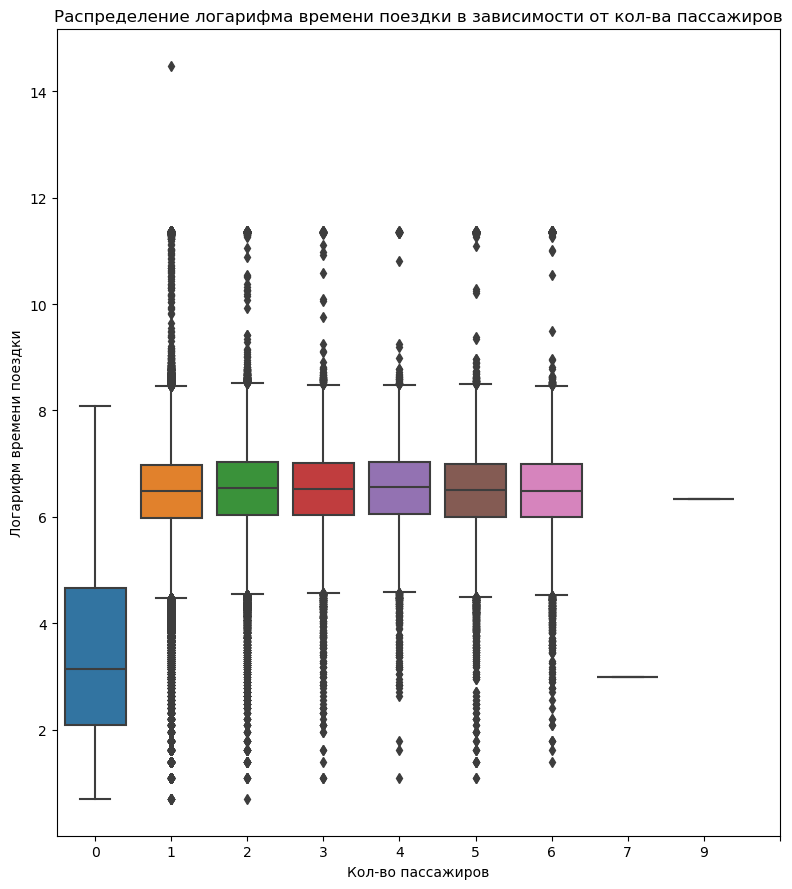

In [1613]:
plt.figure(figsize=(8, 9))  # Размер фигуры
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df)
plt.title('Распределение логарифма времени поездки в зависимости от кол-ва пассажиров')
plt.xlabel('Кол-во пассажиров')
plt.ylabel('Логарифм времени поездки')
plt.xticks([0,1,2,3,4,5,6,7,8,9]) 
plt.tight_layout()
plt.show()

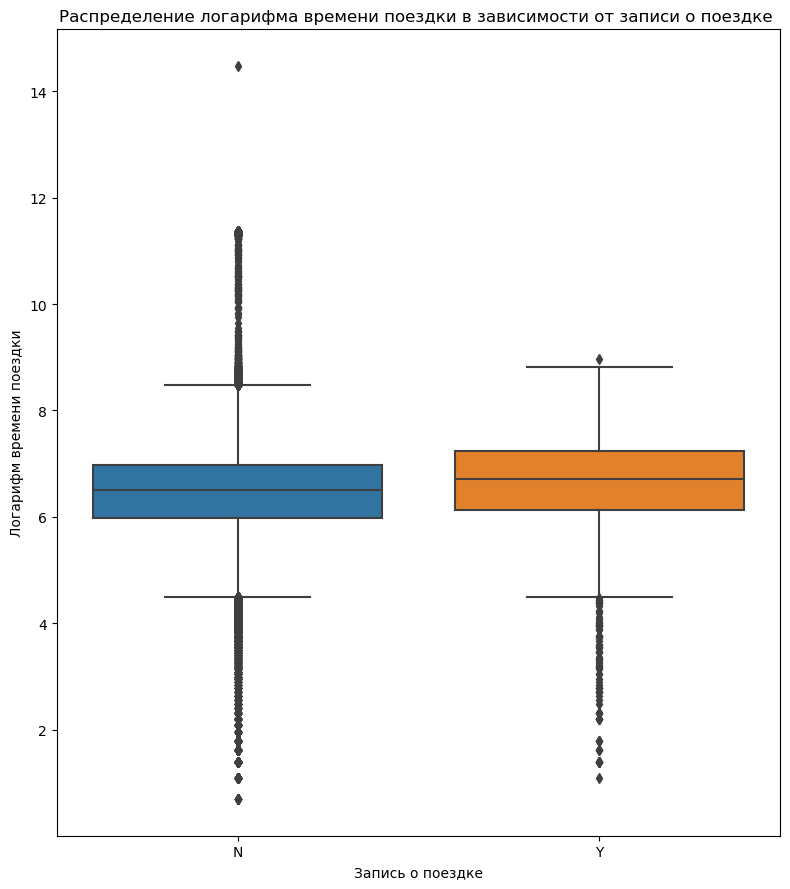

In [1614]:
plt.figure(figsize=(8, 9))  # Размер фигуры
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df)
plt.title('Распределение логарифма времени поездки в зависимости от записи о поездке ')
plt.xlabel('Запись о поездке')
plt.ylabel('Логарифм времени поездки')
plt.xticks([0,1]) 
plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [1615]:
# Для vendor_id, если он уже числовой, но вы хотите нормализовать его к 0 и 1:
df['vendor_id'] = df['vendor_id'].apply(lambda x: 1 if x == 2 else 0)
# Для store_and_fwd_flag, если это строка 'Y'/'N' или что-то подобное:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0}).fillna(0).astype(int)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Задание 12 (0.25 баллов). Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте Ridge-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [1616]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_week', 'pickup_hours', 'month',
       'anomaly_period_1', 'anomaly_period_2', 'day_of_year', 'haversine',
       'log_haversine', 'trip_duration_hour', 'average_speed', 'rush_hour',
       'not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell',
       'dropoff_cell'],
      dtype='object')

In [1617]:
df_3 = df[['log_trip_duration','pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',
           'log_haversine', 'rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell', 'passenger_count']]

In [1618]:
df_3[['pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',
           'rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']] = df_3[['pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',
           'rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell','dropoff_cell']].astype('object')

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_1218/582723939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[['pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',


In [1619]:
df_3.dtypes

log_trip_duration    float64
pickup_hours          object
day_of_week           object
month                 object
day_of_year           object
anomaly_period_1      object
anomaly_period_2      object
log_haversine        float64
rush_hour             object
not_rush_hour         object
from_airport          object
in_airport            object
pickup_cell           object
dropoff_cell          object
passenger_count        int64
dtype: object

In [1620]:
X = df_3.drop('log_trip_duration', axis=1)
y = df_3['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1621]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [1622]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [1624]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Additional metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test MSE = %.4f' % mean_squared_error(y_test, y_pred))
print('Test R2 Score = %.4f' % r2)

Test MSE = 0.2399
Test R2 Score = 0.6199


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


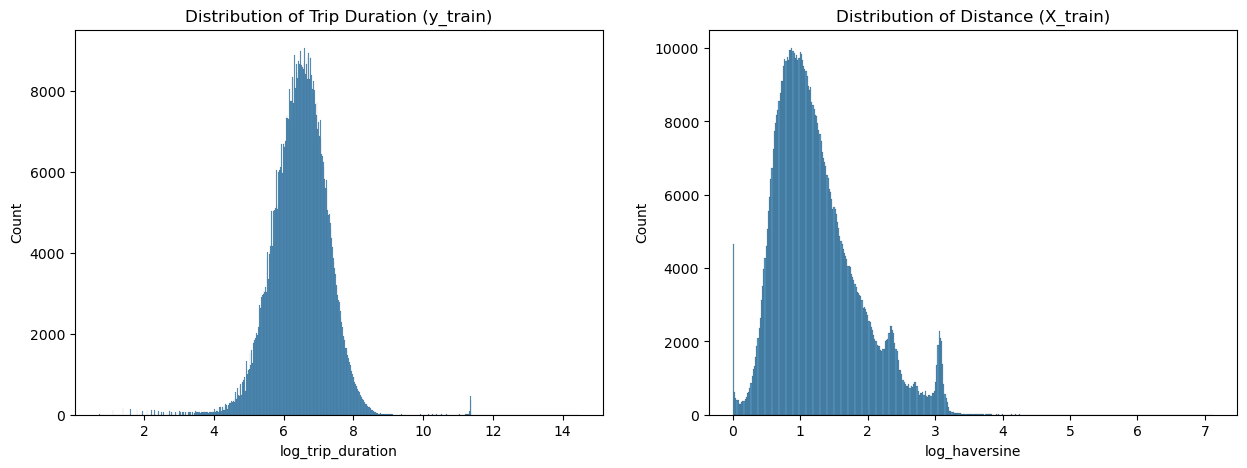

In [1625]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_3['log_trip_duration'], ax=axes[0])
axes[0].set_title('Distribution of Trip Duration (y_train)')

# Предполагается, что 'distance' - это один из столбцов в X_train
sns.histplot(df_3['log_haversine'], ax=axes[1])
axes[1].set_title('Distribution of Distance (X_train)')

plt.show()

In [1626]:
def find_outliers_IQR(series):
    Q1 = series.quantile(0.4)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].index

outliers_duration_index = find_outliers_IQR(y_train)
outliers_distance_index = find_outliers_IQR(X_train['log_haversine'])
# Удаление выбросов из X_train и y_train
X_train_clean = X_train.drop(outliers_duration_index.union(outliers_distance_index))
y_train_clean = y_train.drop(outliers_duration_index.union(outliers_distance_index))

In [1627]:
y_train_clean

605509    6.315358
654962    6.871091
644544    5.918894
315304    5.834811
246683    6.304449
            ...   
644167    6.505784
259178    6.218600
365838    5.700444
671155    6.758095
121958    6.622736
Name: log_trip_duration, Length: 446939, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


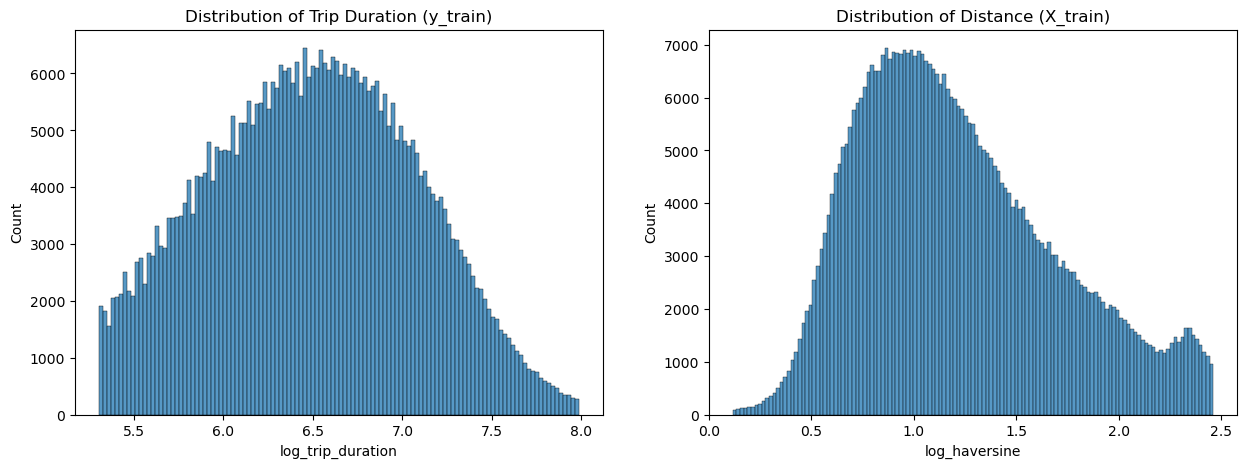

In [1628]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_train_clean, ax=axes[0])
axes[0].set_title('Distribution of Trip Duration (y_train)')

sns.histplot(X_train_clean['log_haversine'], ax=axes[1])
axes[1].set_title('Distribution of Distance (X_train)')

plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [1629]:
X_train_clean.columns

Index(['pickup_hours', 'day_of_week', 'month', 'day_of_year',
       'anomaly_period_1', 'anomaly_period_2', 'log_haversine', 'rush_hour',
       'not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell',
       'dropoff_cell', 'passenger_count'],
      dtype='object')

In [1630]:
df_3['pickup_cell'].value_counts()

pickup_cell
5     729314
8          4
2          2
11         1
3          1
Name: count, dtype: int64

In [1631]:
df_3['dropoff_cell'].value_counts()

dropoff_cell
5    729313
8         6
2         2
3         1
Name: count, dtype: int64

In [1632]:
df_3['pickup_cell'] = df_3['pickup_cell'].apply(lambda x: 1 if x == 5 else 0)
X_train_clean['pickup_cell'] = X_train_clean['pickup_cell'].apply(lambda x: 1 if x == 5 else 0)
X_test['pickup_cell'] = X_test['pickup_cell'].apply(lambda x: 1 if x == 5 else 0)

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_1218/602826923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['pickup_cell'] = df_3['pickup_cell'].apply(lambda x: 1 if x == 5 else 0)


In [1633]:
df_3['dropoff_cell'] = df_3['dropoff_cell'].apply(lambda x: 1 if x == 5 else 0)
X_train_clean['dropoff_cell'] = X_train_clean['dropoff_cell'].apply(lambda x: 1 if x == 5 else 0)
X_test['dropoff_cell'] = X_test['dropoff_cell'].apply(lambda x: 1 if x == 5 else 0)

/var/folders/22/w_0gdhgj699dgr2cp6bwhn800000gn/T/ipykernel_1218/2557055798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['dropoff_cell'] = df_3['dropoff_cell'].apply(lambda x: 1 if x == 5 else 0)


In [1634]:
df_3

,log_trip_duration,pickup_hours,day_of_week,month,day_of_year,anomaly_period_1,anomaly_period_2,log_haversine,rush_hour,not_rush_hour,from_airport,in_airport,pickup_cell,dropoff_cell,passenger_count
0,5.993961,16,0,2,60,0,0,0.788036,True,False,False,False,1,1,1
1,7.003974,23,4,3,71,0,0,1.634932,False,True,False,False,1,1,2
2,7.400010,17,6,2,52,0,0,2.110304,False,True,False,False,1,1,2
3,7.040536,9,1,1,5,0,0,1.212268,True,False,False,False,1,1,6
4,6.744059,6,2,2,48,0,0,1.673076,False,True,False,False,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,5.693732,13,5,5,142,0,0,0.751521,False,True,False,False,1,1,2
729318,5.755742,0,0,2,53,0,0,0.547372,False,True,False,False,1,1,1
729319,6.513230,18,4,4,106,0,0,1.193551,True,False,False,False,1,1,1
729320,6.104793,9,6,6,171,0,0,0.613192,False,True,False,False,1,1,1


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [1635]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_clean, y_train_clean)
y_pred = model.predict(X_test)

# Additional metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test MSE = %.4f' % mean_squared_error(y_test, y_pred))
print('Test R2 Score = %.4f' % r2)

Test MSE = 0.2469
Test R2 Score = 0.6089


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [1636]:
print("Size before OneHot:", X_train_clean.shape)
print("Size after OneHot:", column_transformer.transform(X_train_clean).shape)

Size before OneHot: (446939, 14)
Size after OneHot: (446939, 243)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [1637]:
from sklearn.linear_model import Lasso
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train_clean, y_train_clean)
y_pred = model.predict(X_test)

print('Test MSE = %.4f' % mean_squared_error(y_test, y_pred))
print('Test R2 Score = %.4f' % r2)

Test MSE = 0.6323
Test R2 Score = 0.6089


In [1638]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 2
Zero weights in Lasso: 243


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [1639]:
X_train, X_val, y_train, y_val = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

Best alpha = 0.0100


Text(0, 0.5, 'CV score')

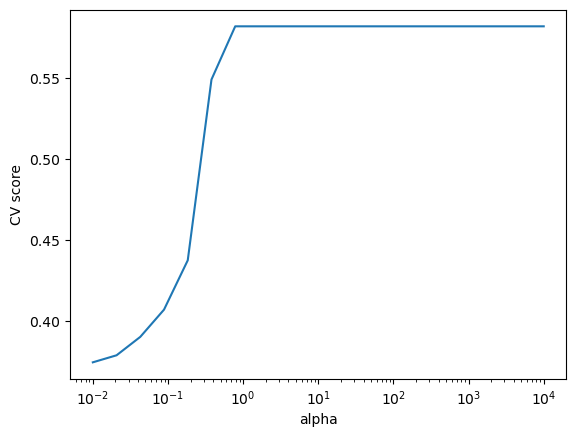

In [1640]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [1641]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred)
print('Lasso Test MSE = {:.4f}'.format(mse_lasso))

Lasso Test MSE = 0.2620


In [1642]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred)
print('Ridge Test MSE = {:.4f}'.format(mse_ridge))

Ridge Test MSE = 0.2470


Сохраните наилучшее значение, как бенчмарк на будущее

In [1643]:
mse_results = {
    'Ridge': mse_ridge,
    'Lasso': mse_lasso
}

# Определение модели с наименьшим MSE
best_model_name = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_model_name]
best_mse_benchmark = best_mse

print(f'Наилучшее MSE = {best_mse:.4f} ({best_model_name})')

Наилучшее MSE = 0.2470 (Ridge)


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [1644]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 2


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [1645]:
import pandas as pd
from collections import Counter

cell_pairs = list(zip(df['pickup_cell'], df['dropoff_cell']))
pair_counts = Counter(cell_pairs)

# Выберем самые популярные пары
most_common_pair = pair_counts.most_common(1)[0][0]

# Закодируем поездки с этими популярными парами как категориальный признак
def encode_trip(row):
    if (row['pickup_cell'], row['dropoff_cell']) == most_common_pair:
        return 1
    else:
        return -1

df['encoded_trip'] = df.apply(encode_trip, axis=1)

In [1646]:
df['encoded_trip'].value_counts()

encoded_trip
 1    729312
-1        10
Name: count, dtype: int64

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [1647]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_week', 'pickup_hours', 'month',
       'anomaly_period_1', 'anomaly_period_2', 'day_of_year', 'haversine',
       'log_haversine', 'trip_duration_hour', 'average_speed', 'rush_hour',
       'not_rush_hour', 'from_airport', 'in_airport', 'pickup_cell',
       'dropoff_cell', 'encoded_trip'],
      dtype='object')

In [1648]:
def find_outliers_IQR(series):
    Q1 = series.quantile(0.4)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].index

outliers_duration_index = find_outliers_IQR(df['log_trip_duration'])
outliers_distance_index = find_outliers_IQR(df['log_haversine'])
# Удаление выбросов из X_train и y_train
df = df.drop(outliers_duration_index.union(outliers_distance_index))

In [1649]:
df = df[['log_trip_duration','pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',
           'log_haversine', 'rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'encoded_trip', 'passenger_count']]

In [1651]:
df[['pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',
           'rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'encoded_trip']] = df[['pickup_hours','day_of_week', 'month', 'day_of_year','anomaly_period_1', 'anomaly_period_2',
           'rush_hour','not_rush_hour', 'from_airport', 'in_airport', 'encoded_trip']].astype('object')

In [1652]:
X = df.drop('log_trip_duration', axis=1)
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1653]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [1654]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [1655]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred)
print('Ridge Test MSE = {:.4f}'.format(mse_ridge))
r2_ridge = r2_score(y_test, y_pred)
print('Ridge Test R^2 = {:.4f}'.format(r2_ridge))

Ridge Test MSE = 0.1309
Ridge Test R^2 = 0.6101


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.